In [1]:
# Generate two random matrices and write them to files
import numpy as np

def generate_matrix(rows, cols):
    return np.random.rand(rows, cols)

def write_matrix_to_file(matrix, filename):
    np.savetxt(filename, matrix, delimiter=' ')

rows, cols = 480, 480
matrix1 = generate_matrix(rows, cols)
matrix2 = generate_matrix(rows, cols)

write_matrix_to_file(matrix1, 'matrixA.txt')
write_matrix_to_file(matrix2, 'matrixB.txt')


BRUTE DEBUG 1 processes: ELAPSED_TIME: 0.379933
BRUTE DEBUG 2 processes: ELAPSED_TIME: 0.173717
BRUTE DEBUG 4 processes: ELAPSED_TIME: 0.173301
BRUTE DEBUG 9 processes: ELAPSED_TIME: 0.217332
BRUTE DEBUG 16 processes: ELAPSED_TIME: 0.231771
BRUTE DEBUG 25 processes: ELAPSED_TIME: 0.242508
BRUTE DEBUG 36 processes: ELAPSED_TIME: 0.319620
FOX DEBUG 4 processes: ELAPSED_TIME: 0.195040
FOX DEBUG 9 processes: ELAPSED_TIME: 0.226049
FOX DEBUG 16 processes: ELAPSED_TIME: 0.217143
FOX DEBUG 25 processes: ELAPSED_TIME: 0.200939
FOX DEBUG 36 processes: ELAPSED_TIME: 0.228118


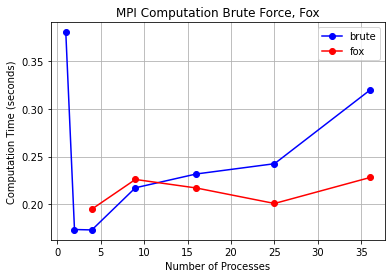

In [2]:

# Calculate the product of the two matrices

import subprocess
import matplotlib.pyplot as plt

def run_mpi_brute(num_processes):
    cmd = f"mpirun -np {num_processes} --oversubscribe ./mpi_matrix_brute"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout

    for line in output.split('\n'):
        if "ELAPSED_TIME:" in line:
            print(f"BRUTE DEBUG {num_processes} processes: {line}")
            parts = line.split()
            if len(parts) > 1:
                try:
                    time_taken = float(parts[1])
                    return time_taken
                except ValueError:
                    print(f"Error: Could not convert '{parts[1]}' to float.")
                    return None
            else:
                print("Error: Unexpected format for ELAPSED_TIME line.")
                return None
    return None

def run_mpi_fox(num_processes):
    cmd = f"mpirun -np {num_processes} --oversubscribe ./mpi_matrix_fox"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout

    for line in output.split('\n'):
        if "ELAPSED_TIME:" in line:
            print(f"FOX DEBUG {num_processes} processes: {line}")
            parts = line.split()
            if len(parts) > 1:
                try:
                    time_taken = float(parts[1])
                    return time_taken
                except ValueError:
                    print(f"Error: Could not convert '{parts[1]}' to float.")
                    return None
            else:
                print("Error: Unexpected format for ELAPSED_TIME line.")
                return None

cmd = "make"
subprocess.run(cmd, shell=True, capture_output=True, text=True)
process_counts = [1, 2, 4, 9, 16, 25, 36]
times_brute = [run_mpi_brute(p) for p in process_counts]
times_fox = [run_mpi_fox(p) for p in process_counts]


plt.plot(process_counts, times_brute, marker='o', color='b', label='brute')
plt.plot(process_counts, times_fox, marker='o', color='r', label='fox')
plt.title("MPI Computation Brute Force, Fox")
plt.xlabel("Number of Processes")
plt.ylabel("Computation Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

BRUTE DEBUG 1 processes: ELAPSED_TIME: 0.366593
BRUTE DEBUG 2 processes: ELAPSED_TIME: 0.167635
BRUTE DEBUG 4 processes: ELAPSED_TIME: 0.174582
BRUTE DEBUG 9 processes: ELAPSED_TIME: 0.211296
BRUTE DEBUG 16 processes: ELAPSED_TIME: 0.200928
BRUTE DEBUG 25 processes: ELAPSED_TIME: 0.224817
BRUTE DEBUG 36 processes: ELAPSED_TIME: 0.356264
FOX DEBUG 4 processes: ELAPSED_TIME: 0.156350
FOX DEBUG 9 processes: ELAPSED_TIME: 0.190034
FOX DEBUG 16 processes: ELAPSED_TIME: 0.206806
FOX DEBUG 25 processes: ELAPSED_TIME: 0.179951
FOX DEBUG 36 processes: ELAPSED_TIME: 0.257155


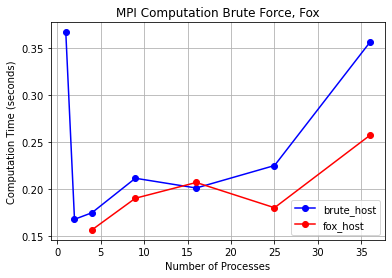

In [3]:
def run_mpi_brute_host(num_processes):
    cmd = f"mpirun -np {num_processes} --oversubscribe --host 192.168.130.130,192.168.130.131 ./mpi_matrix_brute"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout

    for line in output.split('\n'):
        if "ELAPSED_TIME:" in line:
            print(f"BRUTE DEBUG {num_processes} processes: {line}")
            parts = line.split()
            if len(parts) > 1:
                try:
                    time_taken = float(parts[1])
                    return time_taken
                except ValueError:
                    print(f"Error: Could not convert '{parts[1]}' to float.")
                    return None
            else:
                print("Error: Unexpected format for ELAPSED_TIME line.")
                return None
    return None

def run_mpi_fox(num_processes):
    cmd = f"mpirun -np {num_processes} --oversubscribe --host 192.168.130.130,192.168.130.131 ./mpi_matrix_fox"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout

    for line in output.split('\n'):
        if "ELAPSED_TIME:" in line:
            print(f"FOX DEBUG {num_processes} processes: {line}")
            parts = line.split()
            if len(parts) > 1:
                try:
                    time_taken = float(parts[1])
                    return time_taken
                except ValueError:
                    print(f"Error: Could not convert '{parts[1]}' to float.")
                    return None
            else:
                print("Error: Unexpected format for ELAPSED_TIME line.")
                return None

times_brute_host = [run_mpi_brute(p) for p in process_counts]
times_fox_host = [run_mpi_fox(p) for p in process_counts]
plt.plot(process_counts, times_brute_host, marker='o', color='b', label='brute_host')
plt.plot(process_counts, times_fox_host, marker='o', color='r', label='fox_host')
plt.title("MPI Computation Brute Force, Fox")
plt.xlabel("Number of Processes")
plt.ylabel("Computation Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()